# E-commerce - Project

This Data Science project contains an artificial E-commerce dataset to practice exploratory data analysis (EDA) and machine learning techniques. The main question is the following: whether is better to purchase products? In the mobile app or on the website? 

The data contains the following columns: Personal contact, Address, Avatar, Average Session Length, Time on App, Time on Website, and Length of Membership. The data will be used for finding useful insights and revealing possible correlations among such features.

Note: This work is not sponsored by any E-commerce company and it is just one of an outcome of a fun project made using Machine Learning techniques. The project does not aim at the violation of any policies or privacy since the data on is publicly available.

Before proceeding, it is mandatory a previous description of each column, according to the dataset source:

1) Email: Personal contact.

2) Address: Personal address.

3) Avatar

4) Avg. Session Length: Average session of in-store style advice sessions.

5) Time on App: Average time spent on App in minutes.

6) Time on Website: Average time spent on Website in minutes.

7) Length of Membership: How many years the customer has been a member.

## Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the Ecommerce Customers csv file within a DataFrame defined as customers.
customers = pd.read_csv("Ecommerce Customers")

In [4]:
import pandas_profiling

In [5]:
pandas_profiling.ProfileReport(customers)

In [6]:
profile = pandas_profiling.ProfileReport(customers)

In [7]:
# It provides an HTML complete statistical report using a few line codes. 
profile.to_file("report_ecommerce.html")

## Loading the data.

In [8]:
customers.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

## Data Munging

In [9]:
customers.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Using only the float data type.

In [11]:
customers.drop('Address',axis=1,inplace=True)

In [12]:
customers.drop('Email',axis=1,inplace=True)

In [13]:
customers.drop('Avatar',axis=1,inplace=True)

In [14]:
customers.head()

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [15]:
customers.isnull().any()

Avg. Session Length     False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

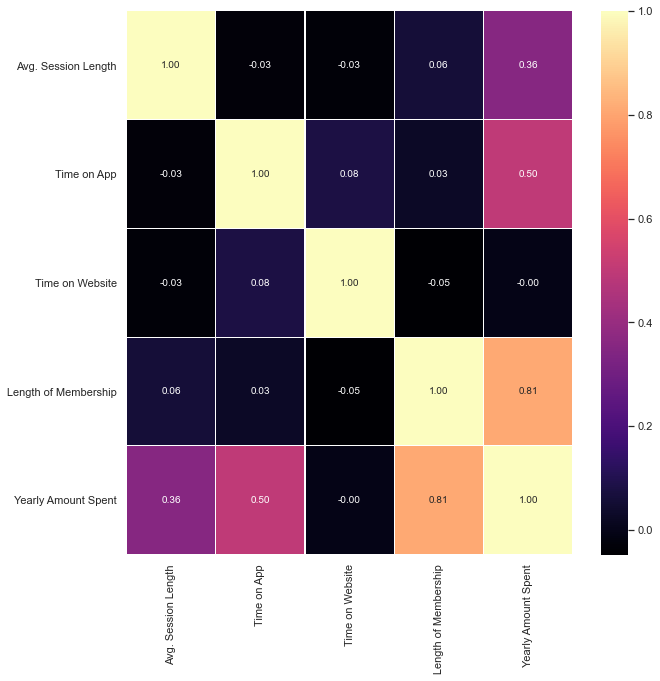

In [20]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(customers.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

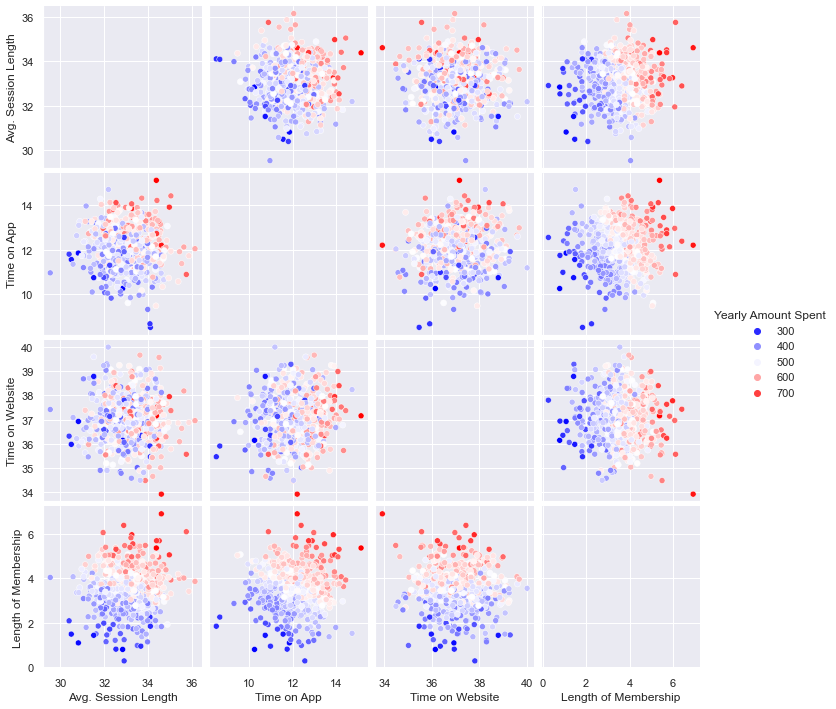

In [21]:
sns.pairplot(customers,hue='Yearly Amount Spent',palette='bwr')

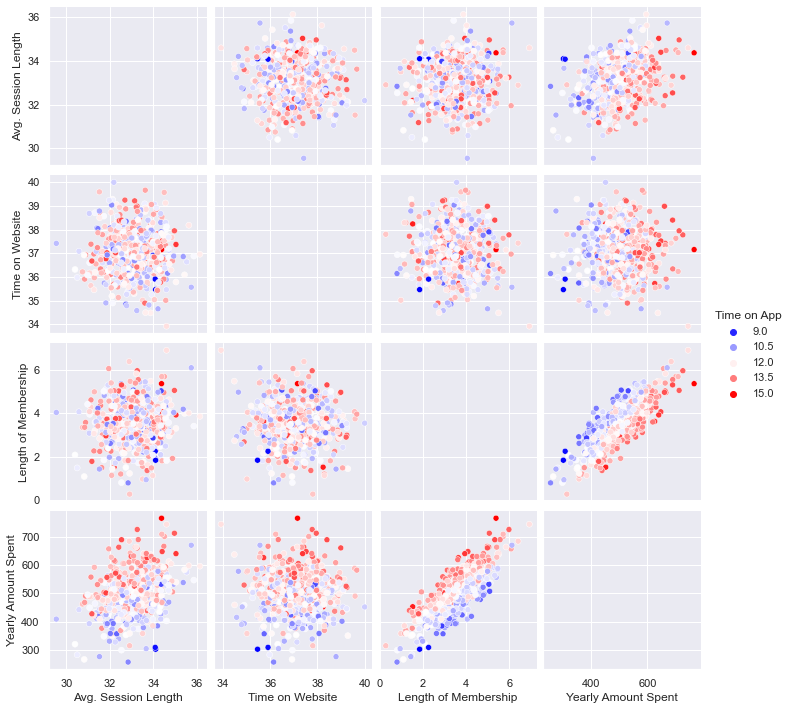

In [22]:
sns.pairplot(customers,hue='Time on App',palette='bwr')

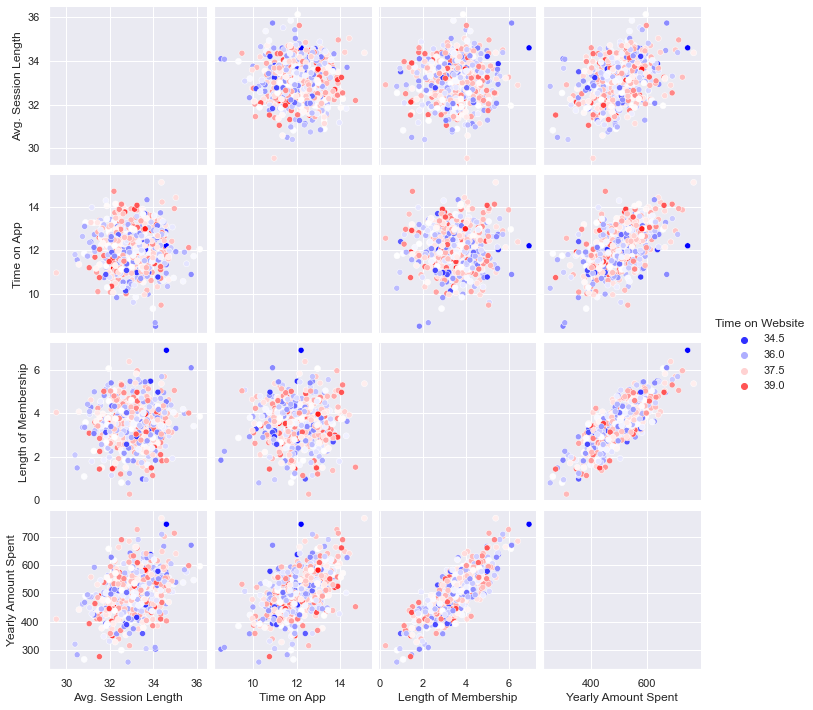

In [23]:
sns.pairplot(customers,hue='Time on Website',palette='bwr')

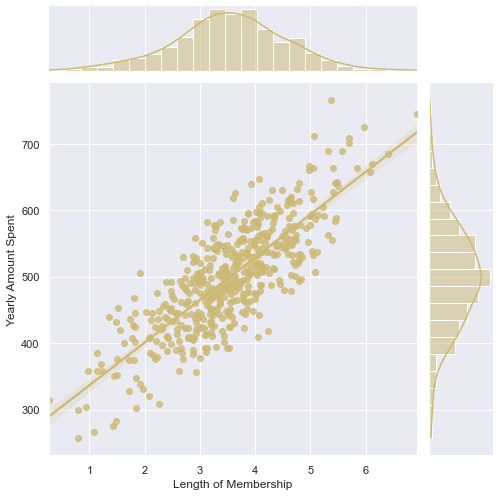

In [24]:
sns.jointplot("Length of Membership", "Yearly Amount Spent", data=customers, kind="reg", color="y", height=7)

We could see that there is a strong linear relation among the variables Length of Membership and Yearly Amount Spent.

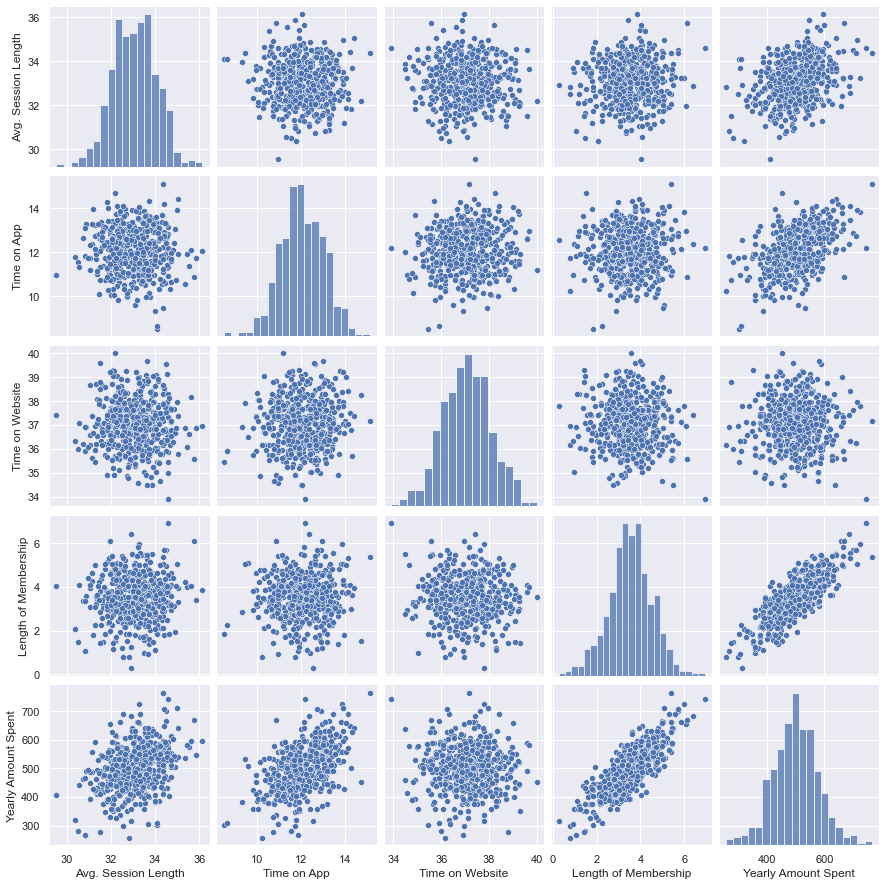

In [25]:
sns.pairplot(customers)

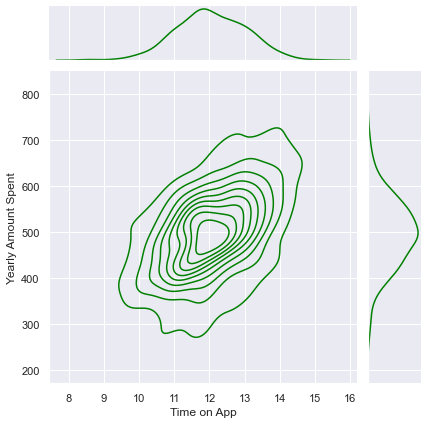

In [26]:
sns.jointplot(y='Yearly Amount Spent',x='Time on App',data=customers,color='green',kind='kde');

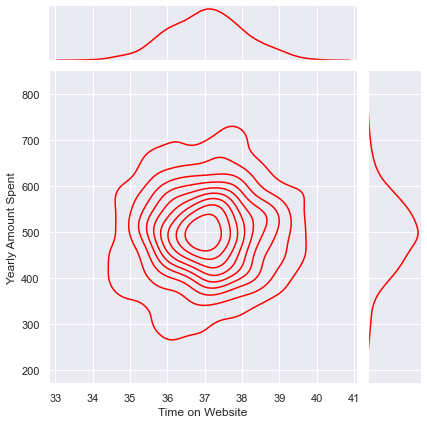

In [27]:
sns.jointplot(y='Yearly Amount Spent',x='Time on Website',data=customers,color='red',kind='kde');

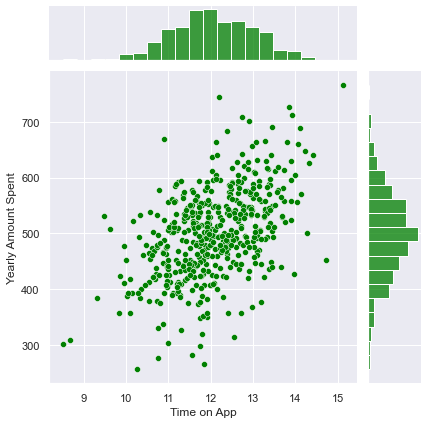

In [28]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,color='green')

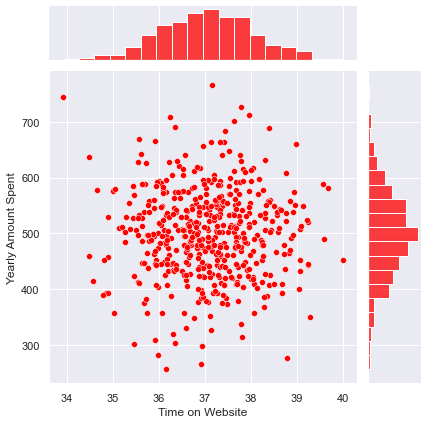

In [29]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,color='red')

# Machine Learning techniques

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [31]:
X_cgpa=customers[["Length of Membership"]]
y=customers[["Yearly Amount Spent"]]

X_cgpa_train,X_cgpa_test,y_train,y_test = train_test_split(X_cgpa,y,test_size=.3,random_state=42)

regr = LinearRegression()
regr.fit(X_cgpa_train, y_train)
y_pred= regr.predict(X_cgpa_test)

<AxesSubplot:xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

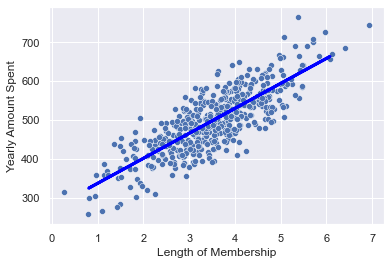

In [32]:
# Plot outputs
plt.figure()
plt.plot(X_cgpa_test,y_pred, color='blue', linewidth=3)
sns.scatterplot(x="Length of Membership", y="Yearly Amount Spent" ,data=customers)

In [33]:
# The coefficients
print('Coefficients: \n', regr.coef_,regr.intercept_)
# Explained variance score: 1 is a perfect prediction
print('r2_score: %.2f' % r2_score(y_test, y_pred))
# Linear e angular coefficients.

Coefficients: 
 [[64.2930116]] [272.46800401]
r2_score: 0.63


Text(0, 0.5, 'Residuals')

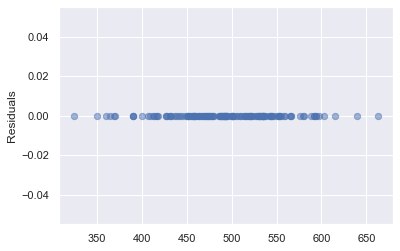

In [34]:
plt.scatter(regr.predict(X_cgpa_test),regr.predict(X_cgpa_test)-y_pred,c='b',s=40,alpha=0.5)
plt.ylabel('Residuals')
# Residuals= ((Real - predict)/Real)^2

In [35]:
y = customers["Yearly Amount Spent"].values
x = customers.drop(["Yearly Amount Spent"],axis=1)

# separating train (80%) and test (20%) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])
# To equalize the axes' scale. 

In [37]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))
#The first two lines.

from sklearn.metrics import r2_score
print("r_2 score: ", r2_score(y_test,y_head_lr))
#mean values

y_head_lr_train = lr.predict(x_train)
print("r_2 score (train dataset): ", r2_score(y_train,y_head_lr_train))
#If we can trust in the data, it can be considered a good model. (approximate 1)
#(This for r_2)

real value of y_test[1]: 534.7771880994133 -> the predict: [542.53325708]
real value of y_test[2]: 418.602742095224 -> the predict: [426.62011918]
r_2 score:  0.9778130629184126
r_2 score (train dataset):  0.9854240629700333


## Random Forest regression

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)
y_head_rfr = rfr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_2 score: ", r2_score(y_test,y_head_rfr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[2],:])))


y_head_rf_train = rfr.predict(x_train)
print("r_2 score (train dataset): ", r2_score(y_train,y_head_rf_train))
#r_2 is better employed for (multi)linear models. 
# Random Forest regression is a nonlinear model.
#It would be better to use MAE (absolute error) , RMSE(Root mean squared error).

r_2 score:  0.9339155952211475
real value of y_test[1]: 534.7771880994133 -> the predict: [551.86819093]
real value of y_test[2]: 418.602742095224 -> the predict: [474.91430436]
r_2 score (train dataset):  0.9926262924095911


## Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_head_dtr = dtr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_2 score: ", r2_score(y_test,y_head_dtr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[2],:])))

y_head_dtr_train = dtr.predict(x_train)
print("r_2 score (train dataset): ", r2_score(y_train,y_head_dtr_train))

r_2 score:  0.8709117551587127
real value of y_test[1]: 534.7771880994133 -> the predict: [535.48077519]
real value of y_test[2]: 418.602742095224 -> the predict: [478.17033405]
r_2 score (train dataset):  1.0


## Bayesian regression

In [40]:
from sklearn import linear_model

bayes = linear_model.BayesianRidge()
bayes.fit(x_train,y_train)
y_head_bayes = bayes.predict(x_test) 

from sklearn.metrics import r2_score
print("r_2 score: ", r2_score(y_test,y_head_bayes))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(bayes.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(bayes.predict(x_test.iloc[[2],:])))

y_head_bayes_train = bayes.predict(x_train)
print("r_2 score (train dataset): ", r2_score(y_train,y_head_bayes_train))
#RMSE_Root mean squared error.
#RRMSE_Relative root mean squared error= RMSE/mean value of target variable
#MAPE_ Mean absolute proportional error.

r_2 score:  0.9778189249564556
real value of y_test[1]: 534.7771880994133 -> the predict: [542.5270894]
real value of y_test[2]: 418.602742095224 -> the predict: [426.63165013]
r_2 score (train dataset):  0.9854240409668426


## Support Vector Machine (SVM)

In [41]:
from sklearn import svm
vector = svm.SVR()
vector.fit(x_train,y_train)
y_head_vector = vector.predict(x_test) 

from sklearn.metrics import r2_score
print("r_2 score: ", r2_score(y_test,y_head_vector))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(vector.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(vector.predict(x_test.iloc[[2],:])))

y_head_vector_train = vector.predict(x_train)
print("r_2 score (train dataset): ", r2_score(y_train,y_head_vector_train))

r_2 score:  0.42341649554853356
real value of y_test[1]: 534.7771880994133 -> the predict: [522.15050368]
real value of y_test[2]: 418.602742095224 -> the predict: [488.65952968]
r_2 score (train dataset):  0.4116005964171816


## Gaussian Process

In [42]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(random_state=0)
gpr.fit(x_train,y_train)
y_head_gpr = gpr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_2 score: ", r2_score(y_test,y_head_gpr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(gpr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(gpr.predict(x_test.iloc[[2],:])))

y_head_gpr_train = gpr.predict(x_train)
print("r_2 score (train dataset): ", r2_score(y_train,y_head_gpr_train))

r_2 score:  0.8348858535782843
real value of y_test[1]: 534.7771880994133 -> the predict: [542.08728027]
real value of y_test[2]: 418.602742095224 -> the predict: [561.22033691]
r_2 score (train dataset):  0.9932505195355557


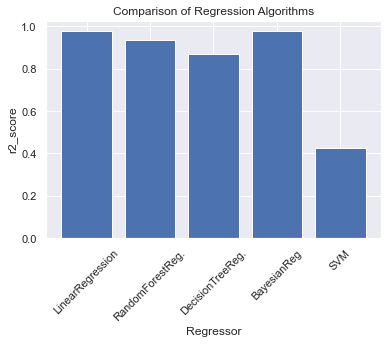

In [43]:
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr),r2_score(y_test,y_head_bayes),r2_score(y_test,y_head_vector)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg.",'BayesianReg','SVM']
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xticks(rotation=45)
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

## Another way

In [44]:
from sklearn.metrics import mean_squared_error,r2_score

target = "compressive_strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    print ("ROOT MEAN SQUARED ERROR :", "{:.2e}".format(np.sqrt(mean_squared_error(dtesty,prediction)) ))
    print ("R² :", r2_score(dtesty,prediction))
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction)
        
    plt.figure(figsize=(13,28))
    plt.subplot(211)
    
    df=pd.DataFrame(data=dtesty,columns=['Yearly Amount Spent'])
    testy = df.reset_index()["Yearly Amount Spent"]
    
    ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
    ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)
  #  plt.axhline(testy.mean(),color = "r",linestyle="dashed",label=("original_mean:",testy.mean()))
  #  plt.axhline(prediction[0].mean(),color="b",linestyle = "dashed",label=("prediction_mean:",prediction[0].mean()))
    plt.legend(loc="best")
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
   # ax.set_facecolor("k")
    
    plt.subplot(212)
    
    if of_type == "coef":
        coef = pd.DataFrame(algorithm.coef_.ravel())
        coef["feat"] = dtrainx.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        #ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.xticks(rotation='vertical')
        plt.title('FEATURE IMPORTANCES')  
    elif of_type == "feat":
        coef = pd.DataFrame(algorithm.feature_importances_)
        coef["feat"] = dtrainx.columns
        ax2 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        #ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.xticks(rotation='vertical')
        plt.title('FEATURE IMPORTANCES')    

LinearRegression()
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.05e+01
R² : 0.9778130629184126
***************************************************************************


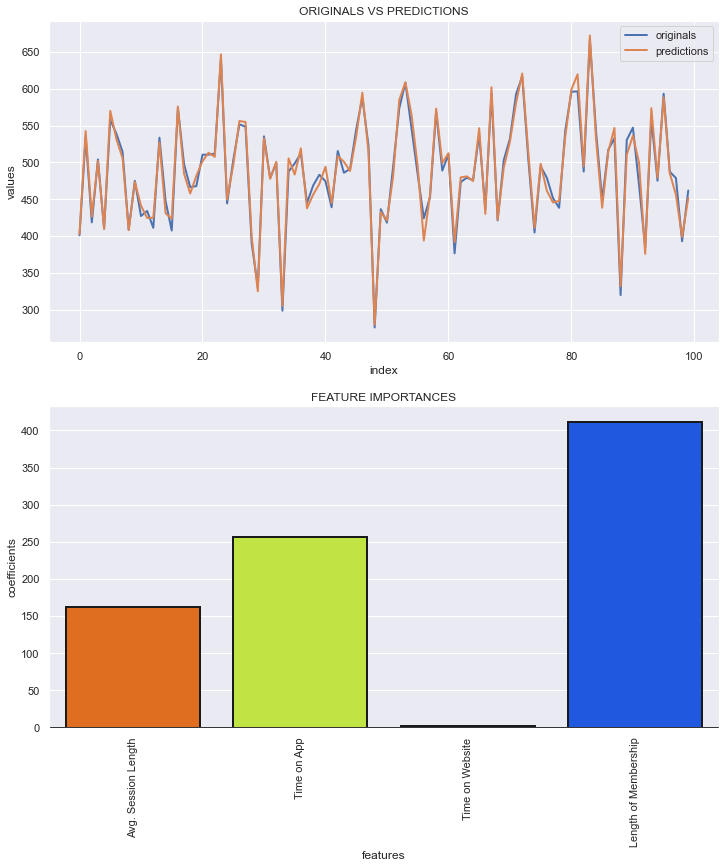

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test,"coef")

Lasso()
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.44e+01
R² : 0.9579295373554734
***************************************************************************


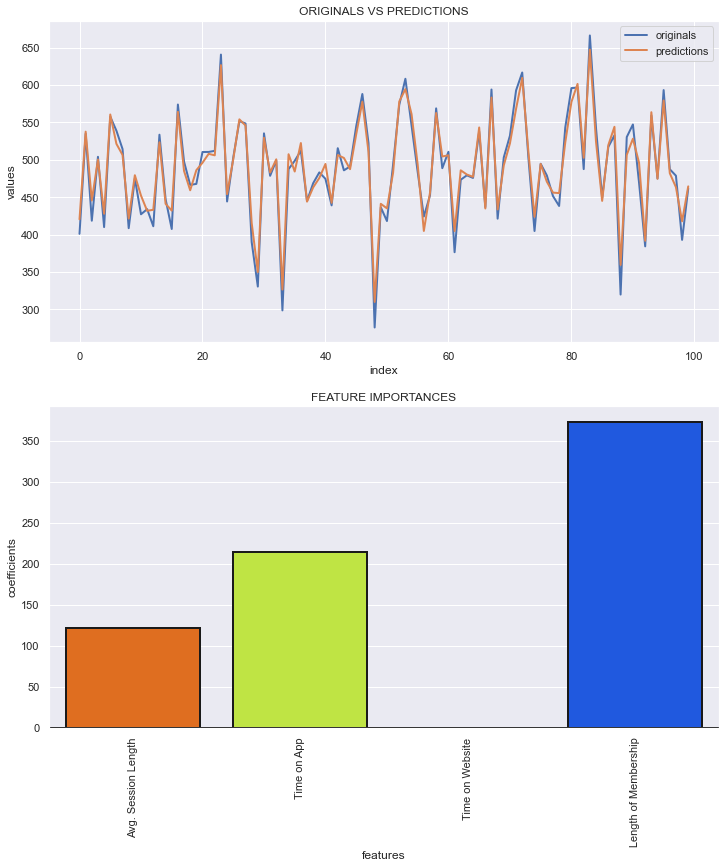

In [48]:
from sklearn.linear_model import Ridge,Lasso
ls = Lasso()
model(ls,x_train,y_train,x_test,y_test,"coef")

Ridge()
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.17e+01
R² : 0.9725710725820463
***************************************************************************


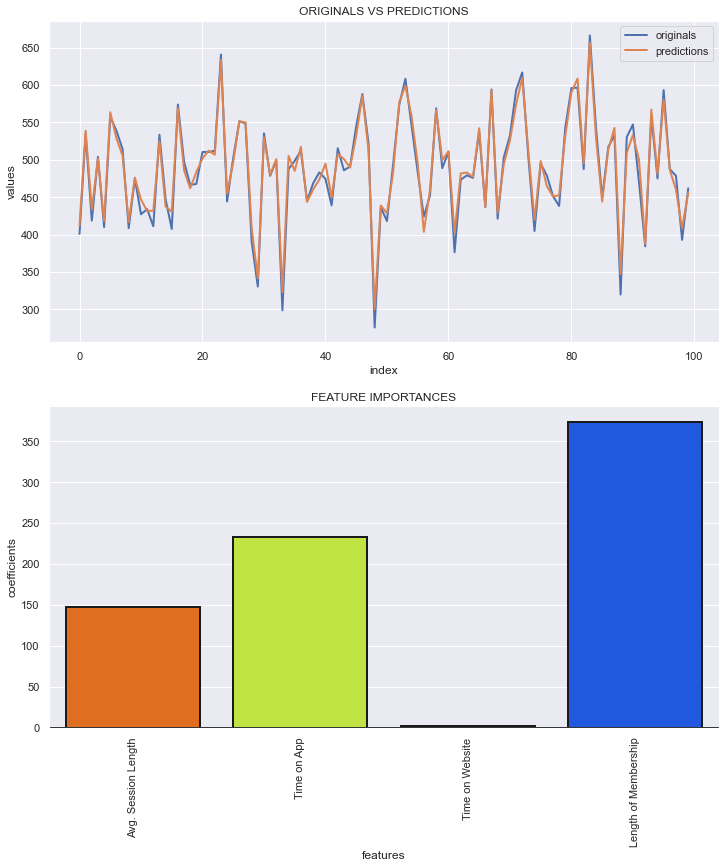

In [49]:
rigde = Ridge()
model(rigde,x_train,y_train,x_test,y_test,"coef")

KNeighborsRegressor()
************************************************************************
ROOT MEAN SQUARED ERROR :  2.10e+01
 R²:  0.910912795516087
***************************************************************************


Text(0, 0.5, 'values')

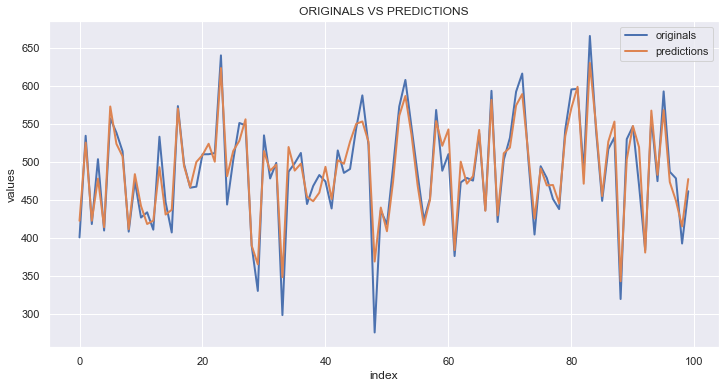

In [50]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

predictions = knn.predict(x_test)
predictions = pd.DataFrame(predictions)


df=pd.DataFrame(data=y_test,columns=['Yearly Amount Spent'])
testy = df.reset_index()["Yearly Amount Spent"]

print (knn)
print ("************************************************************************")
print ("ROOT MEAN SQUARED ERROR : ","{:.2e}".format(np.sqrt(mean_squared_error(y_test,predictions)) ))
print (" R²: ",r2_score(y_test,predictions))
print ("***************************************************************************")
ax3 = testy.plot(label="originals",figsize=(12,6),linewidth=2)
ax3 = predictions[0].plot(label="predictions",figsize=(12,6),linewidth=2)
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
#ax3.set_facecolor("k")

AdaBoostRegressor()
***************************************************************************
ROOT MEAN SQUARED ERROR : 2.60e+01
R² : 0.8632034201037857
***************************************************************************


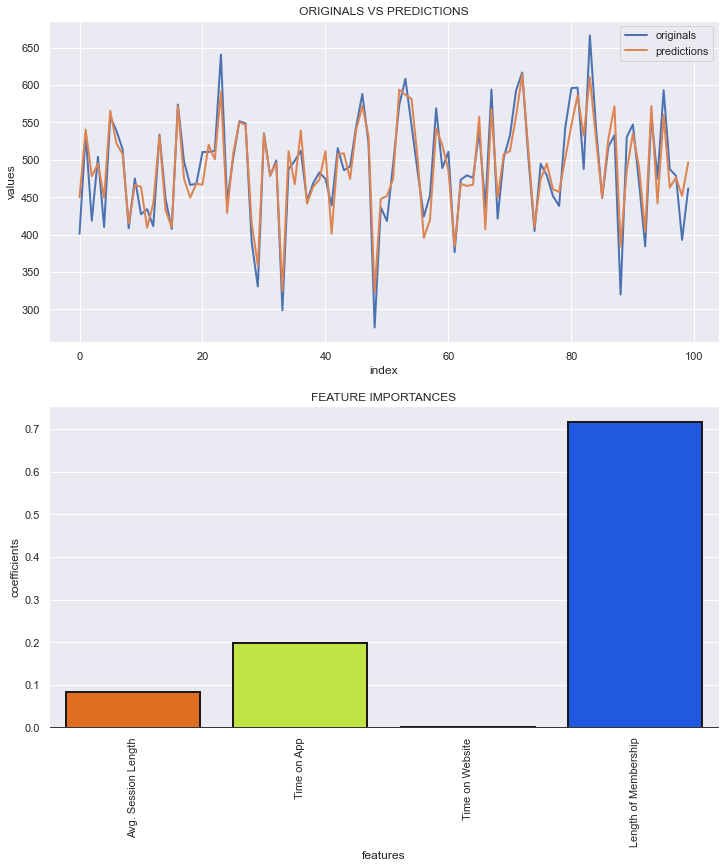

In [51]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model(adb,x_train,y_train,x_test,y_test,"feat")

ExtraTreesRegressor()
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.60e+01
R² : 0.9483582058536594
***************************************************************************


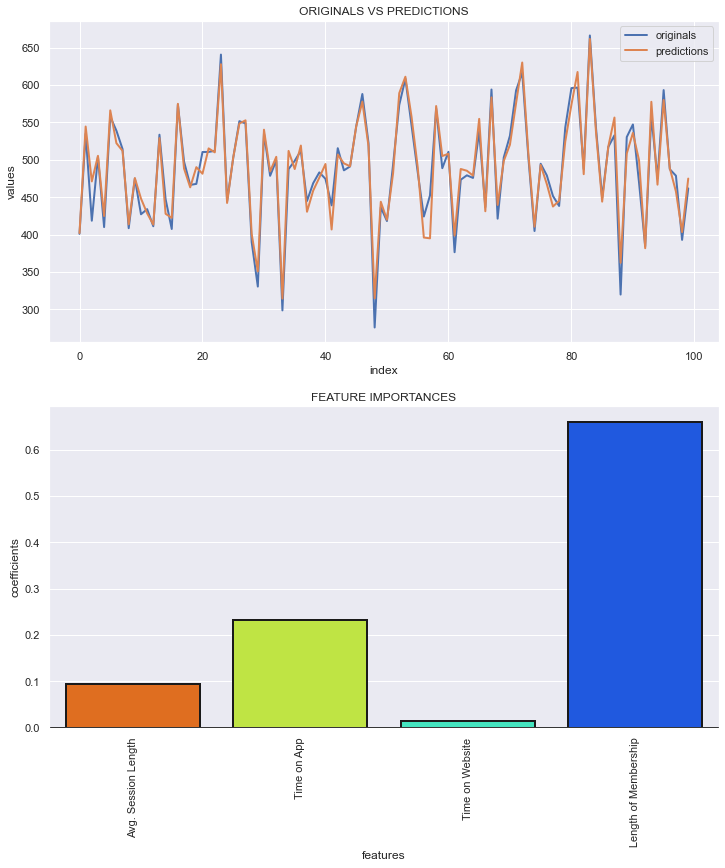

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
model(etr,x_train,y_train,x_test,y_test,"feat")

DecisionTreeRegressor()
***************************************************************************
ROOT MEAN SQUARED ERROR : 2.87e+01
R² : 0.8336373584644114
***************************************************************************


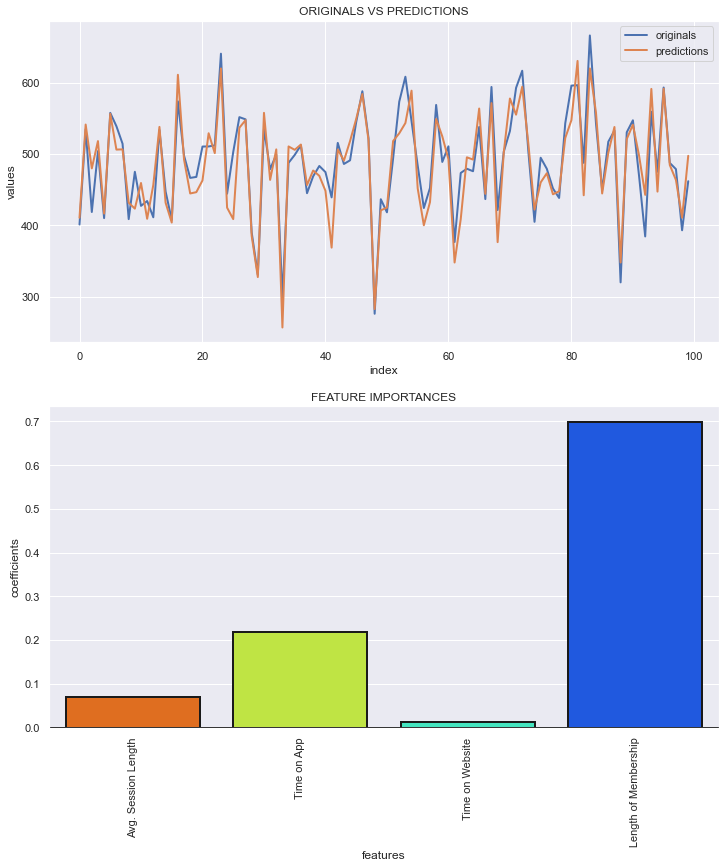

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,x_train,y_train,x_test,y_test,"feat")

RandomForestRegressor()
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.84e+01
R² : 0.9318433506818506
***************************************************************************


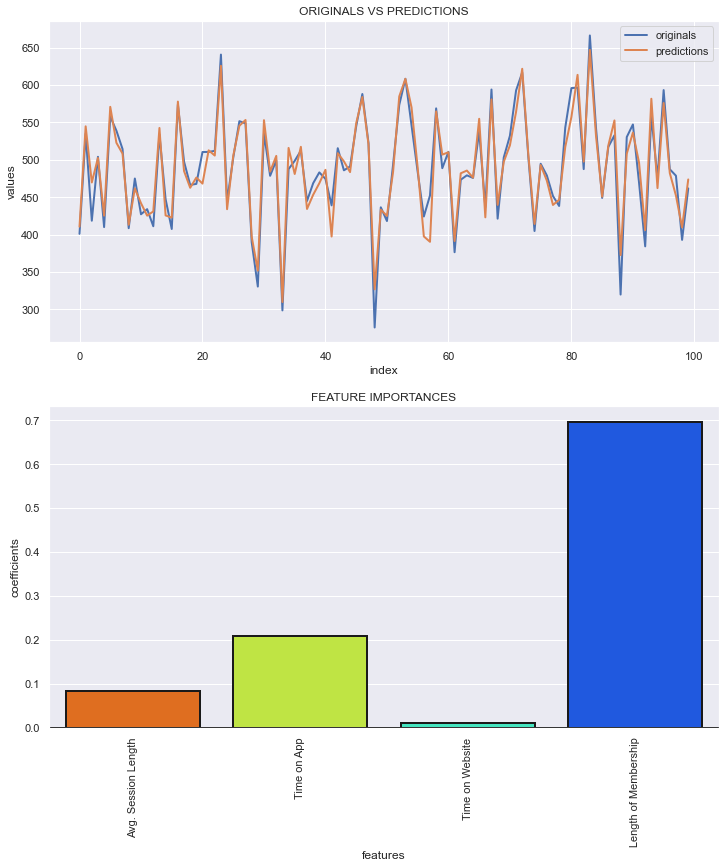

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model(rf,x_train,y_train,x_test,y_test,"feat")

GradientBoostingRegressor()
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.47e+01
R² : 0.9562217197188817
***************************************************************************


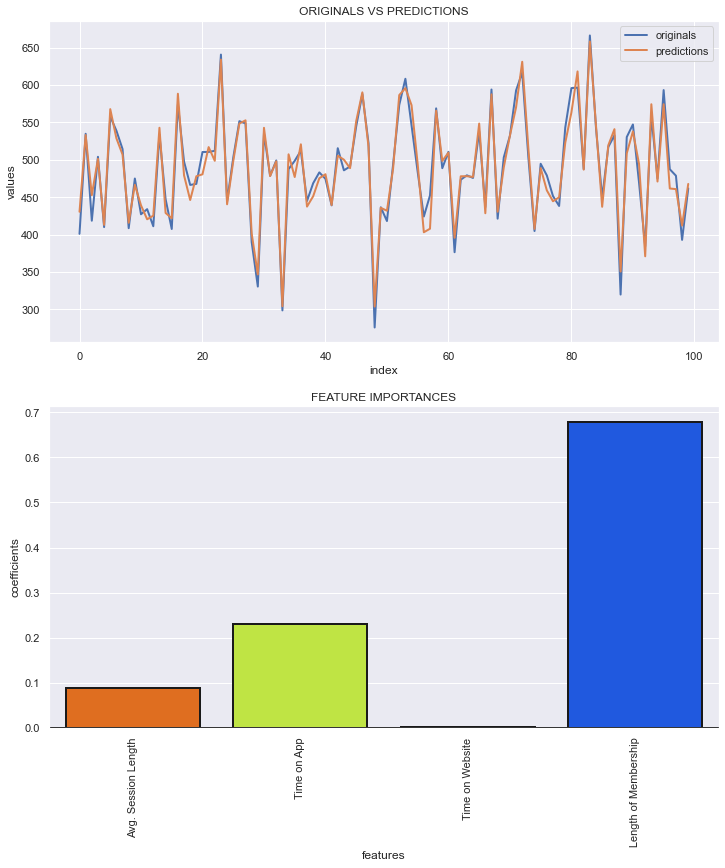

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
model(gbr,x_train,y_train,x_test,y_test,"feat")

Comments: One can observe that the most important feature is the Lenght of Membership by considering the best regressors. Let us check this using PCA and KBest

## PCA


In [54]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)

PCA()

Text(0, 0.5, 'Variance Ratio')

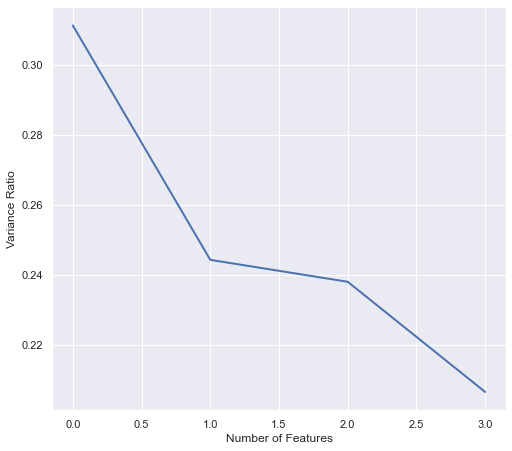

In [55]:
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Features')
plt.ylabel('Variance Ratio')
#20% using only 3 features.
#Less features, greater variance (ideal)!
#Olhar distribuição acumulativa (CDF)

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

UnivariateFeatureSelection = SelectKBest(chi2, k=1).fit(x_train, y_train)
diccionario = {key:value for (key, value) in zip(UnivariateFeatureSelection.scores_, x_train.columns)}
sorted(diccionario.items())

ValueError: Unknown label type: (array([518.78648309, 434.14420203, 605.0610388 , 478.2621264 ,
       424.2028271 , 520.89879445, 489.9080531 , 436.28349815,
       533.04006018, 452.627255  , 433.0487691 , 461.11224843,
       443.44186006, 423.17999168, 689.23569976, 560.44379217,
       647.61945573, 376.33690076, 593.07724134, 591.19717818,
       519.3729768 , 532.71748568, 368.65478495, 657.01992394,
       512.55253436, 461.92087689, 438.41774201, 392.49739919,
       516.83155668, 445.06218551, 447.68790654, 422.42677588,
       424.72877393, 628.04780393, 448.93329321, 453.16950235,
       505.11963753, 700.91709162, 407.70454755, 567.47501053,
       553.60153468, 412.0129313 , 402.16712222, 514.08895775,
       503.38788729, 554.00309343, 519.34098913, 502.4097853 ,
       514.00981785, 530.76671865, 637.10244792, 479.23109291,
       549.86059046, 457.84769594, 397.4205841 , 461.62827839,
       581.85234404, 420.91615953, 508.73574095, 616.85152297,
       459.28512346, 564.79096901, 556.29814117, 554.72208383,
       445.74984124, 541.04983096, 619.89563986, 549.90414611,
       478.18305971, 570.45172591, 490.73863214, 744.2218671 ,
       327.37795259, 506.54730705, 642.10157873, 373.8857237 ,
       430.58888256, 557.52927361, 460.06127739, 531.96155055,
       546.55666686, 424.67528101, 488.27029797, 570.63009809,
       432.48116856, 472.99224667, 594.27448342, 469.3108615 ,
       496.55408164, 506.53639314, 627.60331871, 478.95140476,
       663.07481761, 582.49192373, 549.00822693, 448.34042501,
       505.77114032, 515.82881485, 555.89259539, 407.65717876,
       436.58074035, 338.31986264, 409.07047205, 513.45057119,
       490.20659998, 467.50190043, 458.37691065, 578.24160506,
       487.64623174, 382.41610787, 523.63393514, 571.30749488,
       479.61481167, 282.47124572, 524.79762757, 508.77190674,
       408.21690177, 256.67058229, 558.94811239, 493.18021625,
       410.60294395, 446.41867337, 347.77692663, 352.55010816,
       439.99787994, 482.14499688, 591.78108943, 565.9943634 ,
       626.01867266, 547.36514059, 492.94505307, 505.11334354,
       583.07963566, 521.57217476, 444.57614413, 488.38752578,
       357.78311075, 512.82535813, 426.77521599, 554.90078302,
       482.83098586, 577.27345498, 444.58216498, 492.60601272,
       527.78378976, 492.10505239, 462.89763615, 478.17033405,
       610.12803313, 578.98625858, 427.3565308 , 506.42385997,
       492.5568337 , 560.56016062, 510.15981728, 511.03878605,
       463.4849954 , 549.13157329, 479.73193765, 314.4385183 ,
       432.47206125, 495.17595045, 708.93518487, 521.14295181,
       350.05820016, 538.77493348, 308.52774656, 614.71533383,
       409.09452619, 514.23952072, 452.12262509, 443.96562681,
       563.44603567, 689.78760417, 587.57479948, 533.39655379,
       550.81336773, 484.87696494, 463.59141803, 541.22658399,
       541.97220376, 604.33484007, 475.72506791, 496.93344626,
       431.61773376, 663.80369328, 467.4278485 , 423.47053317,
       483.79652206, 378.47356645, 403.7669021 , 557.634109  ,
       669.9871405 , 501.1224915 , 424.76263551, 501.10024523,
       441.89663152, 486.94705384, 357.85798361, 497.38955776,
       630.15672817, 463.74598112, 506.13234244, 550.04758058,
       529.23009012, 662.96108781, 660.42518429, 630.42276323,
       413.37178311, 576.31117737, 443.19722103, 555.06839405,
       528.4193297 , 547.70998858, 468.44573723, 471.60288439,
       589.02648976, 378.33090691, 521.24078024, 447.18764431,
       542.7115581 , 521.19531053, 448.22982919, 618.84597042,
       765.51846194, 374.26967454, 536.77189936, 451.62861054,
       425.74509203, 583.97780197, 528.22380937, 408.64035107,
       521.88357317, 529.53766534, 421.96679419, 463.92351299,
       537.8252823 , 486.0834255 , 591.43773557, 543.34016626,
       442.66725174, 398.16346853, 462.65651893, 486.16379907,
       537.77316254, 501.87443028, 456.46951007, 544.40927216,
       413.29599918, 475.26342373, 482.60246733, 444.05382657,
       599.40609205, 574.65484337, 478.58428601, 518.06455798,
       547.11098236, 502.13278923, 558.42725718, 439.89128048,
       507.39006179, 584.21831349, 529.0566632 , 507.212569  ,
       563.67287336, 588.71260551, 399.9838716 , 557.25268675,
       504.87043239, 529.19451886, 486.83893477, 491.9115051 ,
       532.93521884, 640.18774001, 356.61556789, 536.42310453,
       574.41568961, 476.19141335, 613.59932337, 482.35357032,
       548.2803202 , 408.95833594, 570.20040896, 505.23006828,
       392.28524425, 540.26340041, 473.94985742, 470.4527333 ,
       586.15587018, 532.75178758, 385.09500707, 553.99467359,
       632.12358814, 387.35707274, 442.36311738, 304.13559158,
       556.18636887, 440.00274755, 501.92826487, 562.08204539,
       536.13089686, 432.72071784, 534.77148495, 393.85737099,
       597.73987888, 576.47760717, 266.08634095, 535.48077519,
       585.9318443 , 590.56271965, 357.59143942, 547.24434342,
       528.93361857, 506.37586675, 612.3852299 , 302.18954781,
       375.39845541, 497.51368333, 451.45744687, 581.30893288,
       392.20493344, 510.5394217 , 494.63860976, 416.35835358,
       483.54319387, 489.812488  , 712.39632681, 507.44183234,
       484.51980911, 581.79879768, 502.0925279 , 611.0000251 ,
       476.13924687, 444.54554965, 384.62657157, 461.79095906,
       614.72963763, 571.47103412, 573.41586733, 584.10588505,
       547.12593175, 458.78113168, 640.7861664 , 497.81193001,
       422.36873661, 403.81951983, 407.80403064, 387.53471631,
       551.0230017 , 596.51669797, 490.6004425 , 522.40414126,
       527.78299576, 725.58481406, 388.94054879, 465.17662331,
       513.15311185, 478.88539132, 529.04900413, 537.2150527 ,
       501.74923331, 496.65070807, 479.73194909, 442.72289157,
       501.20917268, 426.15454771, 419.93877484, 528.30922503,
       407.87637822, 468.91350132, 423.3083341 , 561.51653198,
       476.76672415, 414.93506065, 451.72786332, 493.18126139,
       576.02524413, 574.74721966, 604.84131882, 465.88931271,
       552.94034545, 684.16343102, 561.87465767, 495.29944255,
       385.15233799, 473.72896651, 537.91575292, 442.06441376,
       357.86371864, 577.73602485, 576.8025474 , 497.77864222,
       534.70574381, 524.63796461, 595.8228367 , 494.55186109,
       540.99573911, 392.81034498, 571.21600483, 420.73767324]),)

## Clustering

In [56]:
from sklearn.cluster import KMeans
X=customers[['Length of Membership','Yearly Amount Spent']].values
sse=[]

# range(1,5) is random selection because in our dataset there may not be more than 30 cluster (assumption)
for i in range(1,8):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [57]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


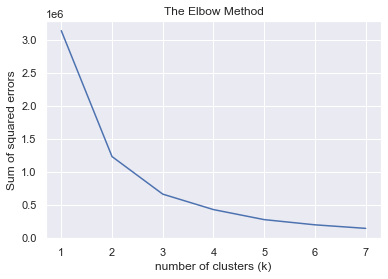

In [58]:
plt.plot(range(1,8), sse)
plt.title('The Elbow Method')
plt.xlabel('number of clusters (k)')
plt.ylabel('Sum of squared errors')
plt.show()

In [59]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

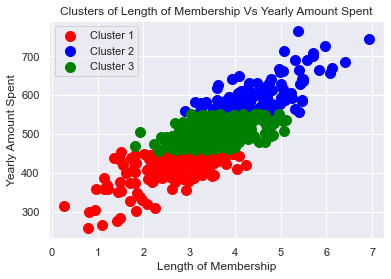

In [60]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Length of Membership Vs Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.legend()
plt.show()

## Classification

In [61]:
customers["label_kmeans"] = y_kmeans
customers.head()

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  label_kmeans  
0           587.951054             1  
1           392.204933             0  
2           487.547505             2  
3           581.852344             1  
4           599.406092             1

In [62]:
customers.tail()

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
495            33.237660    13.566160        36.417985              3.746573   
496            34.702529    11.695736        37.190268              3.576526   
497            32.646777    11.499409        38.332576              4.958264   
498            33.322501    12.391423        36.840086              2.336485   
499            33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  label_kmeans  
495           573.847438             1  
496           529.049004             2  
497           551.620145             2  
498           456.469510             2  
499           497.778642             2

In [63]:
label_kmeans_01=[1 if each==2 else 0 for each in customers["label_kmeans"]]#converting cluster3=1 others=0.
label_kmeans_01_df=pd.DataFrame(data=label_kmeans_01,columns=["label_kmeans"])
customers["label_kmeans"]=label_kmeans_01_df["label_kmeans"]

In [64]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
 5   label_kmeans          500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [65]:
customers=customers.dropna()

In [66]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = customers["label_kmeans"].values
x = customers.drop(["label_kmeans"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

scaler = MinMaxScaler()# escala as features entre 0 e 1.

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

LR: 0.492500 (0.070755)
LDA: 0.532500 (0.068053)
KNN: 0.875000 (0.041833)
CART: 1.000000 (0.000000)
NB: 0.930000 (0.026926)
SVM: 0.910000 (0.046368)


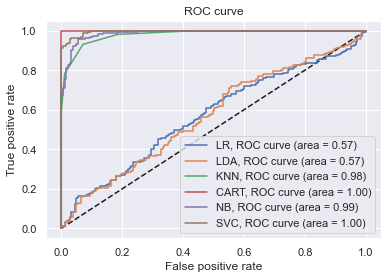

--------------------------
LogisticRegression Report
--------------------------
accuracy = 0.46
confusion matrix [[32 13]
 [41 14]]
              precision    recall  f1-score   support

           0       0.44      0.71      0.54        45
           1       0.52      0.25      0.34        55

    accuracy                           0.46       100
   macro avg       0.48      0.48      0.44       100
weighted avg       0.48      0.46      0.43       100

--------------------------
LinearDiscriminantAnalysis Report
--------------------------
accuracy = 0.46
confusion matrix [[28 17]
 [37 18]]
              precision    recall  f1-score   support

           0       0.43      0.62      0.51        45
           1       0.51      0.33      0.40        55

    accuracy                           0.46       100
   macro avg       0.47      0.47      0.45       100
weighted avg       0.48      0.46      0.45       100

--------------------------
KNeighborsClassifier Report
-------------------

In [67]:
seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
from sklearn import metrics

lr=LogisticRegression().fit(X_train,y_train)
prob_lr=lr.predict_proba(X_train)

lda=LinearDiscriminantAnalysis().fit(X_train,y_train)
prob_lda=lda.predict_proba(X_train)

knn=KNeighborsClassifier().fit(X_train,y_train)
prob_knn=knn.predict_proba(X_train)

cart=DecisionTreeClassifier().fit(X_train,y_train)
prob_cart=cart.predict_proba(X_train)

gnb=GaussianNB().fit(X_train,y_train)
prob_gnb=gnb.predict_proba(X_train)

svm=SVC(probability=True).fit(X_train,y_train)
prob_svm=svm.predict_proba(X_train)
#Compute the ROC curve: true positives/false positives

tpr_lr,fpr_lr,thresh_lr=metrics.roc_curve(y_train,prob_lr[:,0])
tpr_lda,fpr_lda,thresh_lda=metrics.roc_curve(y_train,prob_lda[:,0])
tpr_knn,fpr_knn,thresh_knn=metrics.roc_curve(y_train,prob_knn[:,0])
tpr_cart,fpr_cart,thresh_cart=metrics.roc_curve(y_train,prob_cart[:,0])
tpr_gnb,fpr_gnb,thresh_gnb=metrics.roc_curve(y_train,prob_gnb[:,0])
tpr_svm,fpr_svm,thresh_svm=metrics.roc_curve(y_train,prob_svm[:,0])

#Area under Curve (AUC)
from sklearn.metrics import auc

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lda = auc(fpr_lda, tpr_lda)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_cart = auc(fpr_cart, tpr_cart)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
roc_auc_svm = auc(fpr_svm, tpr_svm)

#Plotting the ROC curves
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR, ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_lda, tpr_lda, label='LDA, ROC curve (area = %0.2f)' % roc_auc_lda)
plt.plot(fpr_knn, tpr_knn, label='KNN, ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_cart, tpr_cart, label='CART, ROC curve (area = %0.2f)' % roc_auc_cart)
plt.plot(fpr_gnb, tpr_gnb, label='NB, ROC curve (area = %0.2f)' % roc_auc_gnb)
plt.plot(fpr_svm, tpr_svm, label='SVC, ROC curve (area = %0.2f)' % roc_auc_svm)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Make predictions on validation dataset
print("--------------------------")
print("LogisticRegression Report")
print("--------------------------")
predictions_lr = lr.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_lr))
print("confusion matrix",confusion_matrix(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))

print("--------------------------")
print("LinearDiscriminantAnalysis Report")
print("--------------------------")
predictions_lda = lda.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_lda))
print("confusion matrix",confusion_matrix(y_test, predictions_lda))
print(classification_report(y_test, predictions_lda))

print("--------------------------")
print("KNeighborsClassifier Report")
print("--------------------------")
predictions_knn = knn.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_knn))
print("confusion matrix",confusion_matrix(y_test, predictions_knn))
print(classification_report(y_test, predictions_knn))

print("--------------------------")
print("DecisionTreeClassifier Report")
print("--------------------------")
predictions = cart.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions))
print("confusion matrix",confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("--------------------------")
print("GaussianNB Report")
print("--------------------------")
predictions_gnb = gnb.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_gnb))
print("confusion matrix",confusion_matrix(y_test, predictions_gnb))
print(classification_report(y_test, predictions_gnb))

print("--------------------------")
print("SVC Report")
print("--------------------------")
predictions_svm = svm.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_svm))
print("confusion matrix",confusion_matrix(y_test, predictions_svm))
print(classification_report(y_test, predictions_svm))

#Precision = TruePositives / (TruePositives + FalsePositives)
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
#The recall is intuitively the ability of the classifier to find all the positive samples.

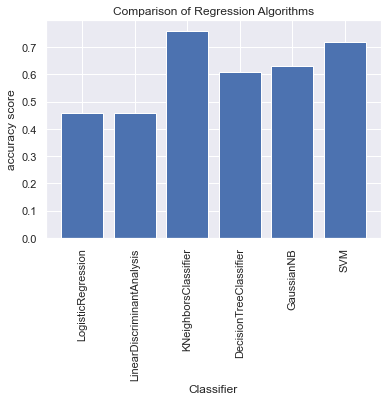

In [68]:
import numpy as np
y = np.array([accuracy_score(y_test, predictions_lr),accuracy_score(y_test, predictions_lda),accuracy_score(y_test, predictions_knn),accuracy_score(y_test, predictions),accuracy_score(y_test, predictions_gnb),accuracy_score(y_test, predictions_svm)])
x = ['LogisticRegression','LinearDiscriminantAnalysis','KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','SVM']
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xticks(rotation=90)
plt.xlabel("Classifier")
plt.ylabel("accuracy score")
plt.show()